# Análise Exploratoria dos Dados

In [8]:
import pandas as pd
import numpy as numpy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

df = pd.read_csv('train.csv') # df com todos os dados

display(train)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


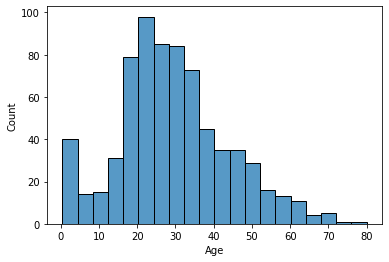

In [144]:
pd.crosstab(df['Embarked'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Um grupo tendo preferencia em sobreviver sobre outro
pd.crosstab(df['Sex'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

df_age_dead_surv = pd.crosstab(pd.cut(df['Age'], bins = [0,2,5,10,20,30,40,50,60,70,80,90,100]), df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Pessoas por idade
sns.histplot(df, x = df['Age'])

#mean_age,median_age (29.69911764705882, 28.0) -> Assimetrica a direita
mean_age = df['Age'].mean()
median_age = df['Age'].median()

In [145]:
display(df_age_dead_surv)

# Pessoas por idade

sns.histplot(df_age_dead_surv, bins = [i*10 for i in range(11)], y = df_age_dead_surv['Dead'].value)

Survived,Dead,Suvived
Age,,
"(0, 2]",9,15
"(2, 5]",4,16
"(5, 10]",13,7
"(10, 20]",71,44
"(20, 30]",146,84
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4


AttributeError: 'Series' object has no attribute 'value'

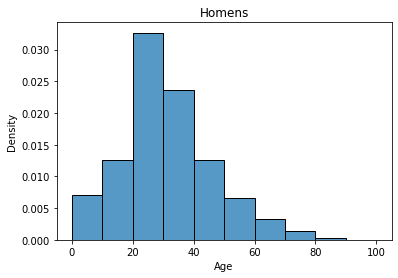

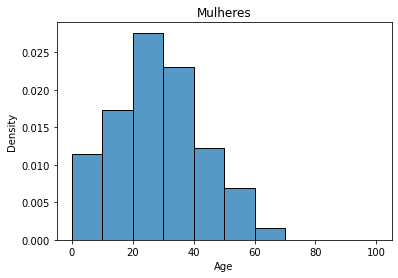

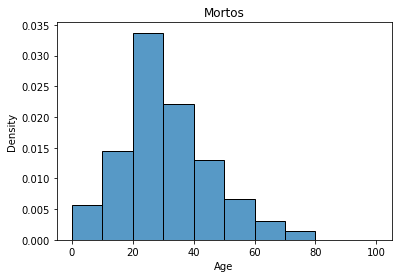

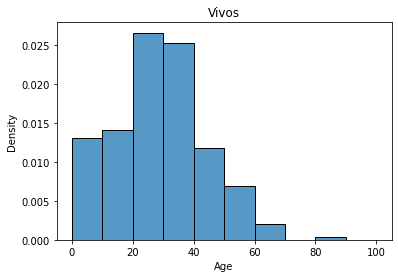

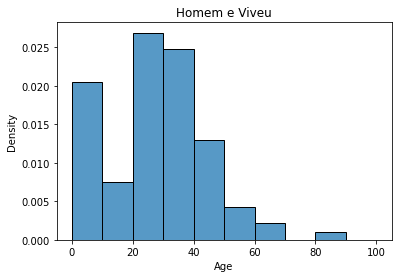

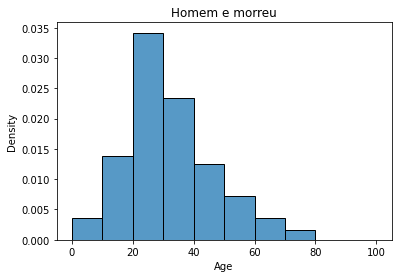

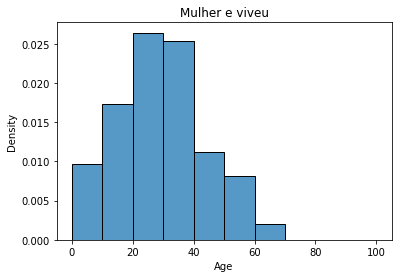

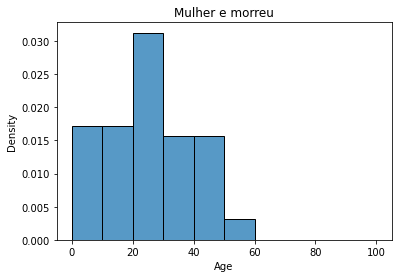

In [149]:
k = [i for i in range(0, 110, 10)]

filtros = ['Sex == "male"', 'Sex == "female"', 'Survived == 0', 'Survived == 1', 'Sex == "male" and Survived == 1', 'Sex == "male" and Survived == 0', 'Sex == "female" and Survived == 1', 'Sex == "female" and Survived == 0']
titulo = ['Homens', 'Mulheres', 'Mortos', 'Vivos', 'Homem e Viveu', 'Homem e morreu', 'Mulher e viveu', 'Mulher e morreu']
stats = ['density']

for i in range(len(filtros)):
    sns.histplot(df.query(filtros[i]), x = df.query(filtros[i])['Age'], stat = stats[0], bins = k).set(title = titulo[i])
    plt.show()

# Mulher
filtros_mulher = ['Sex == "female"', 'Sex == "female" and Survived == 1', 'Sex == "female" and Survived == 0']
titulo_mulher = ['Mulheres', 'Mulher e viveu', 'Mulher e morreu']

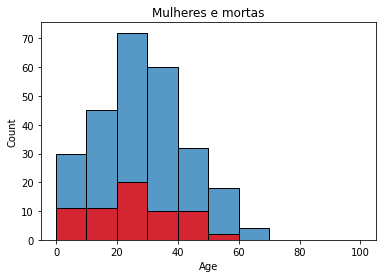

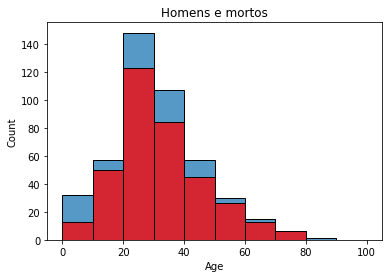

In [147]:
# Mulher
filtros_mulher = ['Sex == "female"', 'Sex == "female" and Survived == 0']

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 0'), x = df.query('Sex == "female" and Survived == 0')['Age'], bins = k,color = 'red').set(title = 'Mulheres e mortas')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 0'), x = df.query('Sex == "male" and Survived == 0')['Age'], bins = k, color = 'red').set(title = 'Homens e mortos')
plt.show()



In [95]:
df_age_dead_surv

Survived,Dead,Suvived,Dead-cum
Age,,,
"(0, 10]",26,38,26
"(10, 20]",71,44,97
"(20, 30]",146,84,243
"(30, 40]",86,69,329
"(40, 50]",53,33,382
"(50, 60]",25,17,407
"(60, 70]",13,4,420
"(70, 80]",4,1,424
